In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('placement.csv')
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

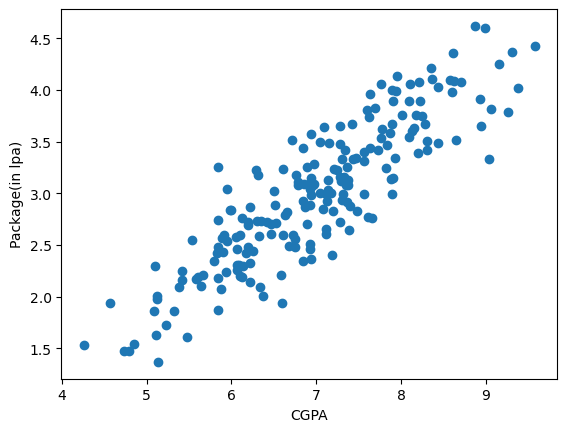

In [2]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [3]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

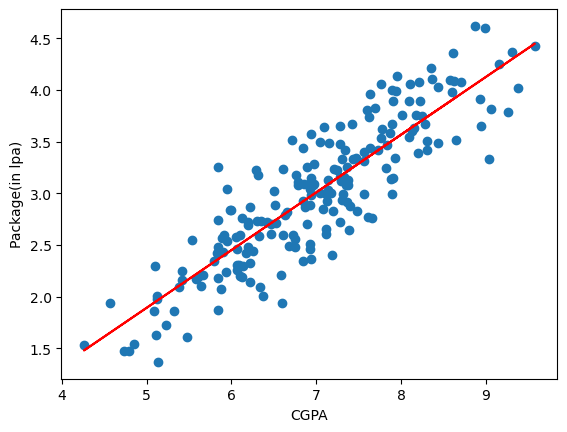

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

# Regression Matrix 

**Mean absolute error (MAE):**

MAE = ∑|y_i - ŷ_i| / n

where:

y_i : is the actual value of the dependent variable for observation i

ŷ_i : is the predicted value of the dependent variable for observation i

n : is the number of observations

<u>Advantages</u>:

_Simple to calculate_: MAE is a simple metric to calculate, and it does not require any special knowledge of statistics.

_Robust to outliers_: MAE is not as sensitive to outliers as MSE, which makes it a good choice for data sets that contain outliers.

_Interpretable_: MAE is easy to interpret, and it can be used to compare the performance of different models.

<u>Disadvantages</u>:

_Not as sensitive to large errors_: MAE is not as sensitive to large errors as MSE, which means that it may not be as effective in detecting poor-performing models.

_Scale-dependent_: MAE is scale-dependent, which means that it is not a good choice for comparing models that are measured on different scales.

_Not differentiable at zero_

In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = lr.predict(X_test)
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [7]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


**Mean squared error (MSE):**

MSE = ∑(y_i - ŷ_i)^2 / n

where:

y_i : is the actual value of the dependent variable for observation i

ŷ_i : is the predicted value of the dependent variable for observation i

n : is the number of observations

<u>Advantages</u>:

_Sensitive to large errors_: MSE is more sensitive to large errors than MAE, which means that it is more effective in detecting poor-performing models.

_Scale-independent_: MSE is scale-independent, which means that it can be used to compare models that are measured on different scales.

_Interpretable_: MSE is easy to interpret, and it can be used to compare the performance of different models.

<u>Disadvantages</u>:

_Sensitive to outliers_: MSE is sensitive to outliers, which means that it may be affected by a small number of extreme values.

_Not robust to outliers_: MAE is not as robust to outliers as MAE, which makes it a poor choice for data sets that contain outliers

In [8]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


**Root mean squared error (RMSE)**:

RMSE = √MSE


In [9]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


**R-squared score**:

R^2 = 1 - ∑(y_i - ŷ_i)^2 / n

In [10]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


**Adjusted R2 Score:**

R^2 adj = 1-[(1-R2)(n-1)/(n-1-k)]

where: 
n = no.of rows

k = independent columns  

In [11]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [12]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [13]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.456225,3.26
1,5.12,0.541703,1.98
2,7.82,0.023909,3.25
3,7.42,0.418516,3.67
4,6.94,0.044861,3.57


Text(0, 0.5, 'Package(in lpa)')

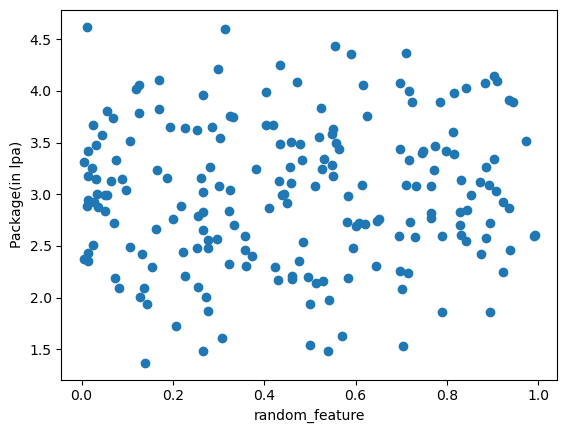

In [14]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [15]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7864488911070859


In [17]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7749055879236852

In [18]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.sample(5)

,cgpa,iq,package
188,7.35,4.08,3.08
196,5.89,3.17,2.57
129,7.29,2.82,3.12
190,6.19,1.49,2.69
115,8.35,4.41,4.21


Text(0, 0.5, 'Package(in lpa)')

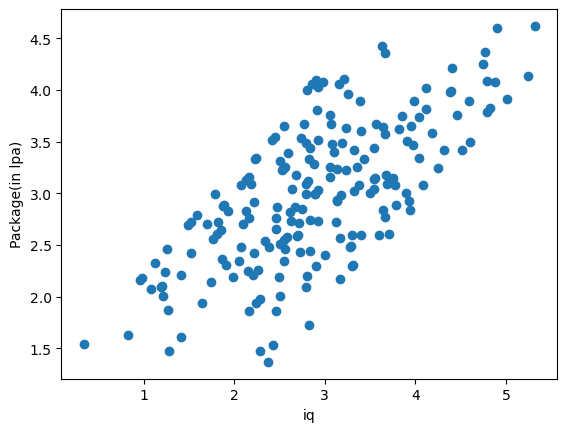

In [19]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [20]:
np.random.randint(-100,100)

3

In [21]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("R2 score : ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score :  0.8188435263590912


In [22]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8090512845406637